The redistricting code and related MCMC (GerryChain) code is adapted from the [GerryChain documentation](https://gerrychain.readthedocs.io/en/latest/user/quickstart.html), by the Metric Geometry and Gerrymandering Group.

See Seaborn documentation [here](https://seaborn.pydata.org/index.html) for visualization.

In [ ]:
#@title
!pip install gerrychain

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 972kB 6.6MB/s 
     |████████████████████████████████| 6.5MB 24.2MB/s 
     |████████████████████████████████| 14.8MB 302kB/s 


In [ ]:
!git clone https://github.com/mggg/GerryChain.git

Cloning into 'GerryChain'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 6007 (delta 20), reused 23 (delta 10), pack-reused 5965
Receiving objects: 100% (6007/6007), 111.77 MiB | 23.33 MiB/s, done.
Resolving deltas: 100% (4094/4094), done.


In [ ]:
# make sure this file shows up in this directory
!ls GerryChain/docs/user/PA_VTDs.json

GerryChain/docs/user/PA_VTDs.json


In [ ]:
path_to_pa = 'GerryChain/docs/user/PA_VTDs.json'

In [ ]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges

graph = Graph.from_json(path_to_pa)

election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

initial_partition = Partition(
    graph,
    assignment="CD_2011",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOTPOP", alias="population"),
        "SEN12": election
    }
)

In [ ]:
for district, pop in initial_partition["population"].items():
    print("District {}: {}".format(district, pop))

District 3: 705317
District 5: 706258
District 10: 705327
District 9: 705679
District 12: 705698
District 6: 705782
District 15: 705549
District 7: 706391
District 16: 705629
District 11: 705883
District 4: 705669
District 8: 705689
District 17: 705830
District 18: 705847
District 14: 705526
District 13: 705028
District 2: 705689
District 1: 705588


In [ ]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=1000
)

In [ ]:
import pandas as pd

d_percents = [sorted(partition["SEN12"].percents("Dem")) for partition in chain]

data = pd.DataFrame(d_percents)

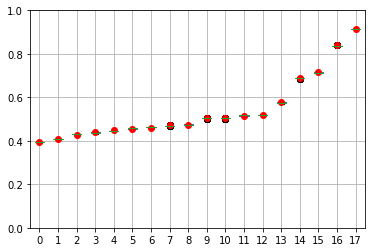

In [ ]:
import matplotlib.pyplot as plt
ax = data.boxplot(positions=range(len(data.columns)))
plt.plot(data.iloc[0], "ro")
plt.ylim(0,1)
plt.show()

# Generic Data in DataFrame
Now, let's take a look at the sociodemographic and political records supporting this analysis.  The file /GerryChain/docs/user/PA_VTDs.json contains tabular data for Vote Tabulation Districts (VTDs), which are precinct-level or similar regions.

In [ ]:
import json

with open(path_to_pa) as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data['nodes'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9255 entries, 0 to 9254
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   boundary_node   9255 non-null   bool   
 1   boundary_perim  305 non-null    float64
 2   area            9255 non-null   float64
 3   STATEFP10       9255 non-null   object 
 4   COUNTYFP10      9255 non-null   object 
 5   VTDST10         9255 non-null   object 
 6   GEOID10         9255 non-null   object 
 7   VTDI10          9255 non-null   object 
 8   NAME10          9255 non-null   object 
 9   NAMELSAD10      9255 non-null   object 
 10  LSAD10          9255 non-null   object 
 11  MTFCC10         9255 non-null   object 
 12  FUNCSTAT10      9255 non-null   object 
 13  ALAND10         9255 non-null   int64  
 14  AWATER10        9255 non-null   int64  
 15  INTPTLAT10      9255 non-null   object 
 16  INTPTLON10      9255 non-null   object 
 17  TOTPOP          9255 non-null   i

In [ ]:
df.head()

,boundary_node,boundary_perim,area,STATEFP10,COUNTYFP10,VTDST10,GEOID10,VTDI10,NAME10,NAMELSAD10,LSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,H_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,ATG12D,ATG12R,F2014GOVD,F2014GOVR,GOV10D,GOV10R,PRES12D,PRES12O,PRES12R,SEN10D,SEN10R,T16ATGD,T16ATGR,T16PRESD,T16PRESOTH,T16PRESR,T16SEND,T16SENR,USS12D,USS12R,REMEDIAL,GOV,TS,CD_2011,SEND,HDIST,538DEM,538GOP,538CMPCT,id
0,True,0.063126,0.004278,42,085,960,42085960,A,SHENANGO TWP VTD WEST,SHENANGO TWP VTD WEST,00,G5240,N,39740056,141805,+41.1564874,-080.4865792,1915,1839,35,1,8,0,3,19,10,3,0,1,0,0,4,2,1553,7,1494,30,1,6,0,2,13,514.000104,388.000078,290.000058,242.000049,289.000058,349.000070,492.000099,11.000002,451.000091,315.000063,328.000066,416.000084,558.000112,342.000069,32.000006,631.000127,379.000076,590.000119,505.000102,423.000085,16,3,3,3,50,7,03,03,03,0
1,False,NaN,0.000551,42,039,40,4203940,A,BLOOMING VALLEY Voting District,BLOOMING VALLEY Voting District,00,G5240,N,5034196,57763,+41.6745788,-080.0382865,337,334,1,0,0,0,0,1,1,1,0,0,0,0,0,0,257,1,254,1,0,0,0,0,1,56.999999,123.999997,44.999999,96.999998,27.999999,124.999997,50.999999,10.000000,126.999997,34.999999,115.999998,39.999999,130.999997,32.999999,8.000000,133.999997,35.999999,125.999997,44.999999,135.999997,16,3,5,3,50,6,03,03,03,1
2,False,NaN,0.007934,42,039,10,4203910,A,ATHENS TWP Voting District,ATHENS TWP Voting District,00,G5240,N,73207387,91606,+41.7499682,-079.8467004,734,719,4,4,0,0,0,2,5,5,0,0,0,0,0,0,586,3,578,1,3,0,0,0,1,67.999996,214.999986,47.999997,155.999990,41.999997,200.999987,74.999995,6.000000,224.999985,51.999997,192.999987,52.999997,266.999983,49.999997,8.999999,273.999982,54.999996,260.999983,64.999996,229.999985,16,3,5,3,50,65,03,03,03,2
3,True,0.091923,0.010283,42,039,20,4203920,A,BEAVER TWP Voting District,BEAVER TWP Voting District,00,G5240,N,94916802,2059,+41.8099591,-080.4562835,902,881,7,0,0,0,0,11,3,2,0,0,0,0,1,0,656,0,645,4,0,0,0,0,7,111.000001,153.000001,66.000000,102.000000,66.000000,139.000001,110.000001,6.000000,167.000001,76.000000,134.000001,89.000000,203.000001,74.000000,13.000000,214.000001,75.000000,204.000001,112.000001,160.000001,16,3,3,3,50,17,03,03,03,3
4,False,NaN,0.010732,42,039,30,4203930,A,BLOOMFIELD TWP Voting District,BLOOMFIELD TWP Voting District,00,G5240,N,98195373,847815,+41.8113731,-079.8363351,1919,1877,7,1,2,1,0,16,15,10,0,0,0,0,1,4,1470,7,1450,2,1,2,0,0,8,329.999982,341.999981,225.999988,230.999987,177.999990,363.999980,314.999983,15.999999,393.999979,196.999989,339.999982,263.999986,528.999971,227.999988,29.999998,555.999970,246.999987,511.999972,267.999985,435.999976,16,3,5,3,50,65,03,03,03,4


In [ ]:
df.groupby('538CMPCT').sum()

,boundary_node,boundary_perim,area,ALAND10,AWATER10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,H_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,ATG12D,ATG12R,F2014GOVD,F2014GOVR,GOV10D,GOV10R,PRES12D,PRES12O,PRES12R,SEN10D,SEN10R,T16ATGD,T16ATGR,T16PRESD,T16PRESOTH,T16PRESR,T16SEND,T16SENR,USS12D,USS12R,TS,CD_2011,SEND,HDIST,id
538CMPCT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,34,0.322017,0.017191,147717854,15277255,706075,333199,147976,1288,56123,229,2632,11806,152822,51620,10753,3103,602,237,75073,11434,537337,99464,282471,102612,959,43008,182,1892,6749,203426.003687,49802.001537,113567.003045,26938.999960,112935.006353,43994.002258,211767.002824,2515.000372,58631.001815,115641.006401,41907.002492,215872.003827,61742.001159,218183.002720,6934.000312,68800.001312,208549.004035,69841.000918,204847.002960,50168.001761,4235,3631,1905,132194,4049224
02,0,0.000000,0.015369,142018481,3685819,705393,161833,465190,2000,31325,200,1243,14022,29580,9595,6346,352,246,45,9845,3151,556940,21101,148626,347647,1561,27345,167,869,9624,325220.154375,21910.633398,200215.719984,11417.829030,219271.695529,16970.582526,345063.131638,2200.994882,22976.612277,223460.703558,15247.583078,325290.246870,25766.520053,336183.257741,6906.936040,21510.537625,323127.196425,28825.532864,328218.142184,21542.666918,1431,1904,4309,163384,4600542
03,60,3.451337,1.344085,12264919958,185777689,705504,643021,32260,981,5065,142,522,9981,13532,7319,904,193,59,28,3647,1382,550752,7860,511725,22105,799,3817,109,221,4116,146521.359783,132068.013307,78627.305807,97755.000820,90196.231759,124635.773965,143622.316811,5067.979480,149532.053804,98781.223528,115077.780379,128540.327114,167971.748522,115965.320681,12751.993016,178203.900227,117453.317599,172309.912661,140902.329406,146111.028527,2452,1969,22332,9678,1823396
04,28,1.860217,0.624455,5900498814,27420276,704866,618944,28895,1029,7567,146,848,10070,37367,16416,2351,449,96,27,14978,3050,541202,22369,487912,19810,818,5522,114,483,4174,124734.285316,163733.665291,77496.517389,114323.144962,58173.098163,151552.022652,110216.558434,5194.864081,187161.222436,64562.162851,145015.001247,111385.098369,214902.428223,102898.208109,14160.950396,214094.181073,104520.982923,209879.651047,113165.774306,178806.096366,1164,1595,9211,30546,1196202
05,28,2.774189,3.413184,31496672591,223642718,706459,664675,13531,829,10095,119,404,6320,10486,5938,539,189,80,15,2887,838,566704,8253,532896,12146,694,8766,95,263,3591,123373.027805,137736.217322,75423.012543,97395.302252,66232.162485,132449.996979,102922.331409,5052.707813,168490.877956,72816.704997,124682.254844,107077.870314,189520.707471,90382.817918,10624.601506,199949.392546,95272.120341,186816.147589,104133.286063,162939.209523,3311,3752,18677,50690,2450007
06,0,0.000000,0.343316,3199901284,39468233,705516,567906,31009,863,18089,144,802,9518,77185,31553,4237,867,189,87,34103,6149,533291,46641,446923,21858,664,12604,117,408,4076,163546.095212,146146.765340,101893.064359,96459.541579,90774.451464,126397.727822,159435.191309,4498.111815,162651.644458,97549.454136,119408.704237,156712.800679,172084.453950,156729.925202,14602.215979,166980.257282,148622.801775,174501.366945,160987.951702,153470.755103,2930,2920,7627,38064,908673
07,24,0.425868,0.075442,693641807,22344734,705977,497496,139359,856,33632,145,929,11117,22443,10880,2520,268,177,38,6258,2302,541020,14937,397364,96983,628,24922,106,534,5546,206182.890825,134226.771430,137290.881973,89907.786164,132730.816253,119279.832331,213743.897251,3552.995500,140943.763205,141252.829435,111458.815729,212092.753131,151677.827665,224377.744307,12182.970484,136118.849602,205767.741878,157334.818588,212355.897582,132209.771933,2080,2351,8499,83990,2397312
08,36,1.072864,0.174674,1602513561,45743282,705352,607275,26183,867,29324,150,954,9653,30946,16667,1111,510,131,41,9916,2570,545323,20108,478469,18823,649,21831,114,562,4767,18120

Various code snippets for descriptive statistics below are borrowed from "[A Quick Guide on Descriptive Statistics using Pandas and Seaborn](https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32)," by Bee Guan Teo, 

df.info() provides type information for the fields of the tabular data.  int64 and float64 are numerical columns.  Various "objects" represent either categorical variables or string identifiers.

## Visualizing census ethnic group counts by VTD



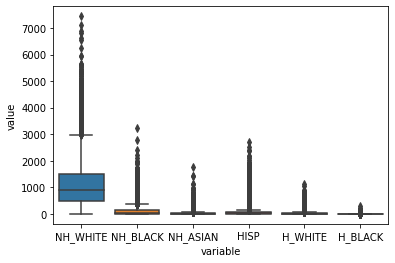

In [ ]:
import numpy as np; np.random.seed(42)
#import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

# pdmelt() Converts a tabular dataframe with multiple columns into a two-column dataframe, where one column is the original column heading, and the other column contains the value

# Boxplot of several important census ethnic groups across the VTDs
sns.boxplot(x="variable", y="value", data=pd.melt(df[['NH_WHITE','NH_BLACK','NH_ASIAN','HISP','H_WHITE','H_BLACK']]))

plt.show()

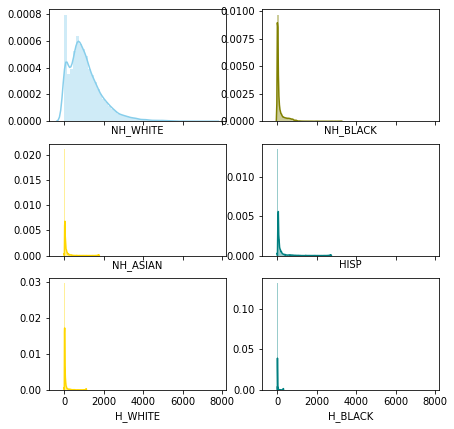

In [ ]:
# Histogram plots for important census ethnic groups
# See https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["NH_WHITE"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["NH_BLACK"] , color="olive", ax=axes[0, 1])
sns.distplot( df["NH_ASIAN"] , color="gold", ax=axes[1, 0])
sns.distplot( df["HISP"] , color="teal", ax=axes[1, 1])
sns.distplot( df["H_WHITE"] , color="gold", ax=axes[2, 0])
sns.distplot( df["H_BLACK"] , color="teal", ax=axes[2, 1])

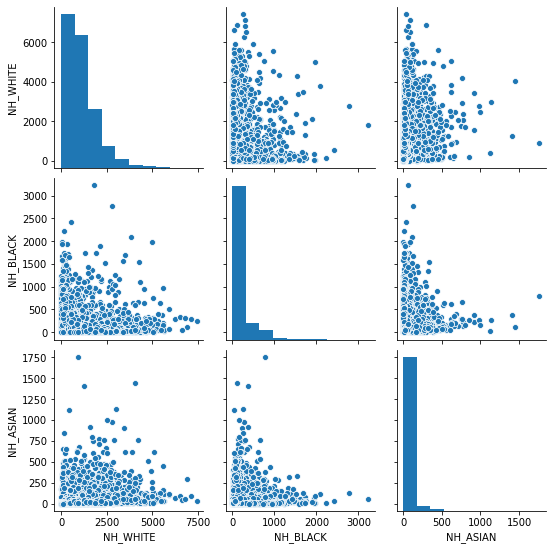

In [ ]:
# Basic correlogram; see https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
#sns.pairplot(df[['NH_WHITE','NH_BLACK','NH_ASIAN','HISP','H_WHITE','H_BLACK']])
sns.pairplot(df[['NH_WHITE','NH_BLACK','NH_ASIAN']])
#sns.plt.show()

## Visualizing 2016 election vote counts for president and US Senate by VTD



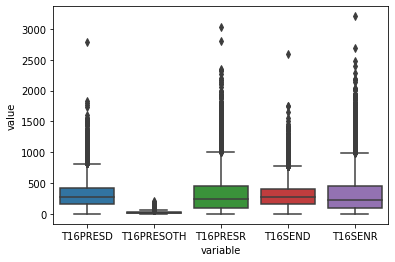

In [ ]:
# Boxplot of vote breakdowns in the Pennsylvania 2016 presidential and senate races across the VTDs
sns.boxplot(x="variable", y="value", data=pd.melt(df[['T16PRESD','T16PRESOTH','T16PRESR','T16SEND','T16SENR']]))

plt.show()

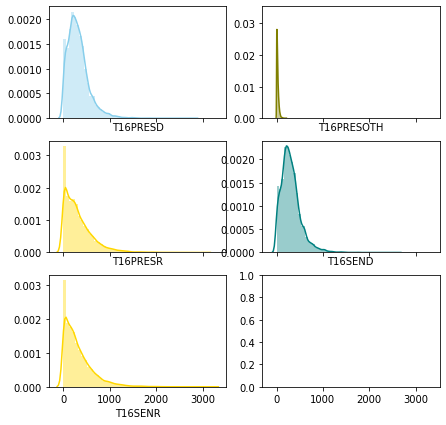

In [ ]:
# Histogram of vote breakdowns in the Pennsylvania 2016 presidential and senate races across the VTDs
# See https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
# Trump (R) won the presidential vote by 44,292 votes
# Toomey (R) won the US Senate race 2,951,702 to 2,865,012
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["T16PRESD"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["T16PRESOTH"] , color="olive", ax=axes[0, 1])
sns.distplot( df["T16PRESR"] , color="gold", ax=axes[1, 0])
sns.distplot( df["T16SEND"] , color="teal", ax=axes[1, 1])
sns.distplot( df["T16SENR"] , color="gold", ax=axes[2, 0])

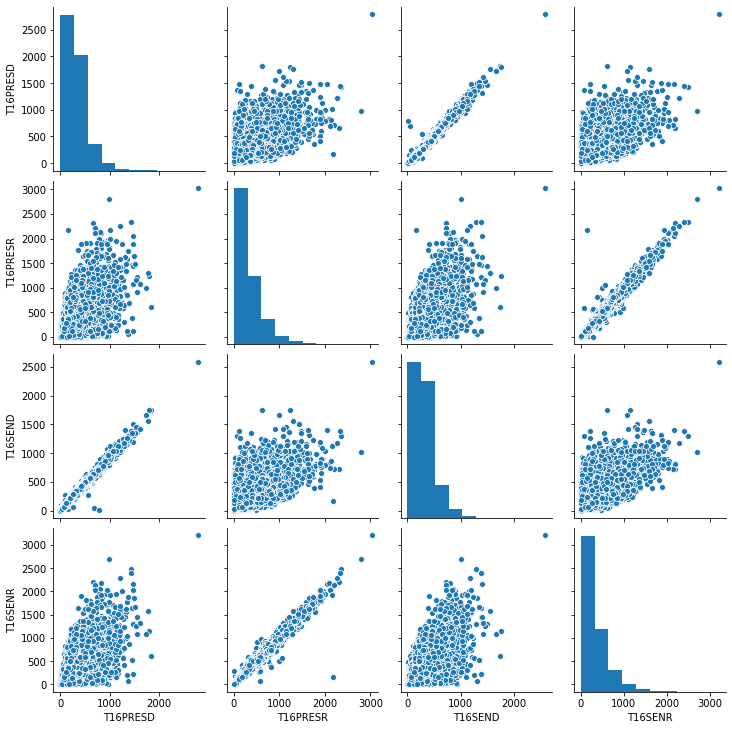

In [ ]:
# Basic correlogram; see https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
#sns.pairplot(df[['NH_WHITE','NH_BLACK','NH_ASIAN','HISP','H_WHITE','H_BLACK']])
sns.pairplot(df[['T16PRESD','T16PRESR','T16SEND','T16SENR']])
#sns.plt.show()

## Visualizing 2016 election votes for president: R/D versus 'NH_WHITE','NH_BLACK',

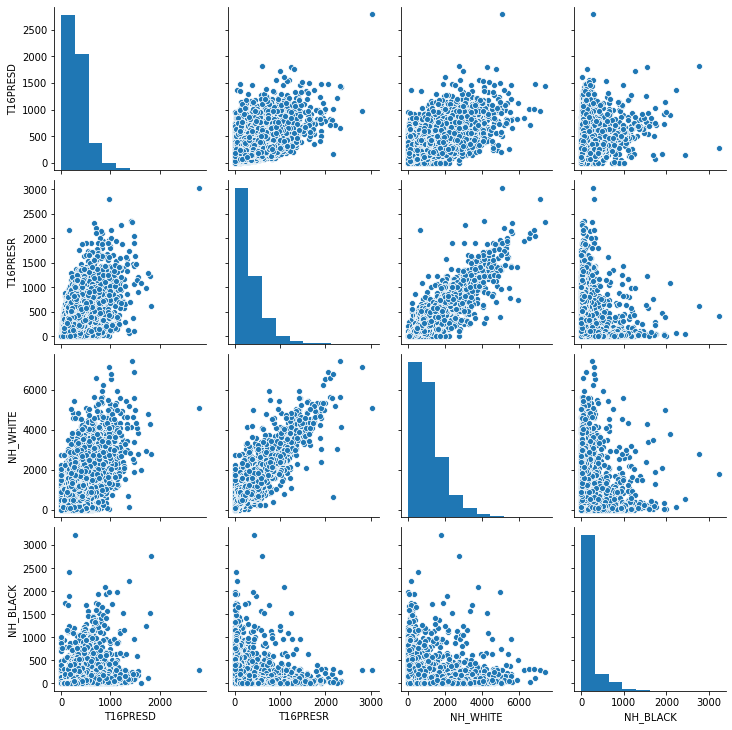

In [ ]:
# Basic correlogram; see https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
sns.pairplot(df[['T16PRESD','T16PRESR','NH_WHITE','NH_BLACK']])
#sns.plt.show()

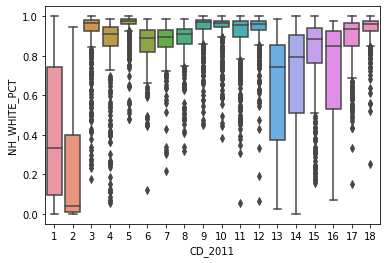

In [ ]:
df['NH_WHITE_PCT']=df['NH_WHITE']/df['TOTPOP']
sns.boxplot(x="CD_2011", y="NH_WHITE_PCT", data=df)

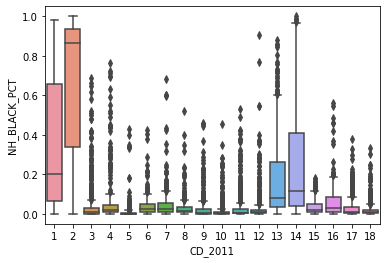

In [ ]:
df['NH_BLACK_PCT']=df['NH_BLACK']/df['TOTPOP']
df['NH_WHITE_PCT']=df['NH_BLACK']/df['TOTPOP']
sns.boxplot(x="CD_2011", y="NH_BLACK_PCT", data=df)

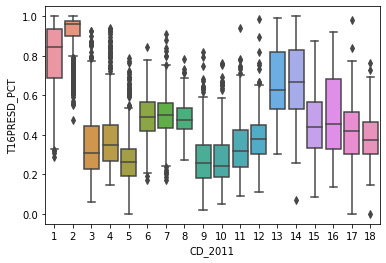

In [ ]:
df['T16PRESTOT']=df['T16PRESR']+df['T16PRESD']+df['T16PRESOTH']
df['T16PRESR_PCT']=df['T16PRESR']/df['T16PRESTOT']
df['T16PRESD_PCT']=df['T16PRESD']/df['T16PRESTOT']
sns.boxplot(x="CD_2011", y="T16PRESD_PCT", data=df)

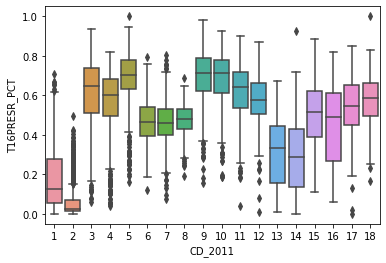

In [ ]:
df['T16PRESTOT']=df['T16PRESR']+df['T16PRESD']+df['T16PRESOTH']
df['T16PRESR_PCT']=df['T16PRESR']/df['T16PRESTOT']
sns.boxplot(x="CD_2011", y="T16PRESR_PCT", data=df)

## Plotting NH_BLACK census category versus VTDs and districts

In [ ]:
import seaborn as sns
# Scatterplot with colors by congressional district.  Too busy!
# See https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/
sns.scatterplot(x="NH_BLACK_PCT", y="T16PRESR_PCT", hue="CD_2011", data=df);

## CD 2011 Redistrict Plan

In [ ]:
set(df['CD_2011'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

Group the VTDs by district and aggregate counts; compute percentages of NH_BLACK, NH_WHITE census categories, R/D 2016 presidential vote percentages.

In [ ]:
df_by_cd2011 = df.groupby('CD_2011').sum()
df_by_cd2011['INDEX']=df_by_cd2011.index
df_by_cd2011['T16PRESTOT']=df_by_cd2011['T16PRESR']+df_by_cd2011['T16PRESD']+df_by_cd2011['T16PRESOTH']
df_by_cd2011['T16PRESR_PCT']=df_by_cd2011['T16PRESR']/df_by_cd2011['T16PRESTOT']
df_by_cd2011['T16PRESD_PCT']=df_by_cd2011['T16PRESD']/df_by_cd2011['T16PRESTOT']
df_by_cd2011['NH_BLACK_PCT']=df_by_cd2011['NH_BLACK']/df_by_cd2011['TOTPOP']
df_by_cd2011['NH_WHITE_PCT']=df_by_cd2011['NH_WHITE']/df_by_cd2011['TOTPOP']

df_by_cd2011['T16_REP_PCT'] = df_by_cd2011['T16PRESR']/(df_by_cd2011['T16PRESR']+df_by_cd2011['T16PRESD'])
df_by_cd2011['T16_DEM_PCT'] = df_by_cd2011['T16PRESD']/(df_by_cd2011['T16PRESR']+df_by_cd2011['T16PRESD'])
total_rep_pct = df_by_cd2011['T16_REP_PCT'].sum()
total_dem_pct = df_by_cd2011['T16_DEM_PCT'].sum()
d_shift_fairness = (9-total_dem_pct)/18
df_by_cd2011['T16_NEW_DEM_PCT'] = df_by_cd2011['T16_DEM_PCT']+d_shift_fairness
df_by_cd2011['T16_NEW_REP_PCT'] = df_by_cd2011['T16_REP_PCT']-d_shift_fairness
df_by_cd2011.loc[df_by_cd2011['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_cd2011.loc[df_by_cd2011['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_cd2011.loc[df_by_cd2011['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_cd2011.loc[df_by_cd2011['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_cd2011['REP'].sum()
dem_win = df_by_cd2011['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
print ("CD 2011 plan")
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))

CD 2011 plan
Pro Republican
partisan bias : 0.11111111111111116


## 2018 Remedial Plan

In [ ]:
df_by_REMEDIAL = df.groupby('REMEDIAL').sum()
df_by_REMEDIAL['INDEX']=df_by_REMEDIAL.index
df_by_REMEDIAL['T16PRESTOT']=df_by_REMEDIAL['T16PRESR']+df_by_REMEDIAL['T16PRESD']+df_by_REMEDIAL['T16PRESOTH']
df_by_REMEDIAL['T16PRESR_PCT']=df_by_REMEDIAL['T16PRESR']/df_by_REMEDIAL['T16PRESTOT']
df_by_REMEDIAL['T16PRESD_PCT']=df_by_REMEDIAL['T16PRESD']/df_by_REMEDIAL['T16PRESTOT']
df_by_REMEDIAL['NH_BLACK_PCT']=df_by_REMEDIAL['NH_BLACK']/df_by_REMEDIAL['TOTPOP']
df_by_REMEDIAL['NH_WHITE_PCT']=df_by_REMEDIAL['NH_WHITE']/df_by_REMEDIAL['TOTPOP']

In [ ]:
df_by_REMEDIAL['T16_REP_PCT'] = df_by_REMEDIAL['T16PRESR']/(df_by_REMEDIAL['T16PRESR']+df_by_REMEDIAL['T16PRESD'])
df_by_REMEDIAL['T16_DEM_PCT'] = df_by_REMEDIAL['T16PRESD']/(df_by_REMEDIAL['T16PRESR']+df_by_REMEDIAL['T16PRESD'])
total_rep_pct = df_by_REMEDIAL['T16_REP_PCT'].sum()
total_dem_pct = df_by_REMEDIAL['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_REMEDIAL['T16_NEW_DEM_PCT'] = df_by_REMEDIAL['T16_DEM_PCT']+d_shift_fairness
df_by_REMEDIAL['T16_NEW_REP_PCT'] = df_by_REMEDIAL['T16_REP_PCT']-d_shift_fairness
df_by_REMEDIAL.loc[df_by_REMEDIAL['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_REMEDIAL.loc[df_by_REMEDIAL['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_REMEDIAL.loc[df_by_REMEDIAL['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_REMEDIAL.loc[df_by_REMEDIAL['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_REMEDIAL['REP'].sum()
dem_win = df_by_REMEDIAL['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
print ("2018 Remedial Plan")
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))


2018 Remedial Plan
Pro Republican
partisan bias : 0.05555555555555558


## Governor's plan

In [ ]:
df_by_GOV = df.groupby('GOV').sum()
df_by_GOV['INDEX']=df_by_GOV.index
df_by_GOV['T16PRESTOT']=df_by_GOV['T16PRESR']+df_by_GOV['T16PRESD']+df_by_GOV['T16PRESOTH']
df_by_GOV['T16PRESR_PCT']=df_by_GOV['T16PRESR']/df_by_GOV['T16PRESTOT']
df_by_GOV['T16PRESD_PCT']=df_by_GOV['T16PRESD']/df_by_GOV['T16PRESTOT']
df_by_GOV['NH_BLACK_PCT']=df_by_GOV['NH_BLACK']/df_by_GOV['TOTPOP']
df_by_GOV['NH_WHITE_PCT']=df_by_GOV['NH_WHITE']/df_by_GOV['TOTPOP']

df_by_GOV['T16_REP_PCT'] = df_by_GOV['T16PRESR']/(df_by_GOV['T16PRESR']+df_by_GOV['T16PRESD'])
df_by_GOV['T16_DEM_PCT'] = df_by_GOV['T16PRESD']/(df_by_GOV['T16PRESR']+df_by_GOV['T16PRESD'])
total_rep_pct = df_by_GOV['T16_REP_PCT'].sum()
total_dem_pct = df_by_GOV['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_GOV['T16_NEW_DEM_PCT'] = df_by_GOV['T16_DEM_PCT']+d_shift_fairness
df_by_GOV['T16_NEW_REP_PCT'] = df_by_GOV['T16_REP_PCT']-d_shift_fairness
df_by_GOV.loc[df_by_GOV['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_GOV.loc[df_by_GOV['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_GOV.loc[df_by_GOV['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_GOV.loc[df_by_GOV['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_GOV['REP'].sum()
dem_win = df_by_GOV['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))


Pro Republican
partisan bias : 0.05555555555555558


## Turzai-Scarnati Plan (TS)

In [ ]:
df_by_TS = df.groupby('TS').sum()
df_by_TS['INDEX']=df_by_TS.index
df_by_TS['T16PRESTOT']=df_by_TS['T16PRESR']+df_by_TS['T16PRESD']+df_by_TS['T16PRESOTH']
df_by_TS['T16PRESR_PCT']=df_by_TS['T16PRESR']/df_by_TS['T16PRESTOT']
df_by_TS['T16PRESD_PCT']=df_by_TS['T16PRESD']/df_by_TS['T16PRESTOT']
df_by_TS['NH_BLACK_PCT']=df_by_TS['NH_BLACK']/df_by_TS['TOTPOP']
df_by_TS['NH_WHITE_PCT']=df_by_TS['NH_WHITE']/df_by_TS['TOTPOP']

df_by_TS['T16_REP_PCT'] = df_by_TS['T16PRESR']/(df_by_TS['T16PRESR']+df_by_TS['T16PRESD'])
df_by_TS['T16_DEM_PCT'] = df_by_TS['T16PRESD']/(df_by_TS['T16PRESR']+df_by_TS['T16PRESD'])
total_rep_pct = df_by_TS['T16_REP_PCT'].sum()
total_dem_pct = df_by_TS['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_TS['T16_NEW_DEM_PCT'] = df_by_TS['T16_DEM_PCT']+d_shift_fairness
df_by_TS['T16_NEW_REP_PCT'] = df_by_TS['T16_REP_PCT']-d_shift_fairness
df_by_TS.loc[df_by_TS['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_TS.loc[df_by_TS['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_TS.loc[df_by_TS['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_TS.loc[df_by_TS['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_TS['REP'].sum()
dem_win = df_by_TS['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))

Pro Republican
partisan bias : 0.16666666666666663


## 538 Dem favoring (538DEM)

In [ ]:
df_by_538DEM = df.groupby('538DEM').sum()
df_by_538DEM['INDEX']=df_by_538DEM.index
df_by_538DEM['T16PRESTOT']=df_by_538DEM['T16PRESR']+df_by_538DEM['T16PRESD']+df_by_538DEM['T16PRESOTH']
df_by_538DEM['T16PRESR_PCT']=df_by_538DEM['T16PRESR']/df_by_538DEM['T16PRESTOT']
df_by_538DEM['T16PRESD_PCT']=df_by_538DEM['T16PRESD']/df_by_538DEM['T16PRESTOT']
df_by_538DEM['NH_BLACK_PCT']=df_by_538DEM['NH_BLACK']/df_by_TS['TOTPOP']
df_by_TS['NH_WHITE_PCT']=df_by_538DEM['NH_WHITE']/df_by_538DEM['TOTPOP']

df_by_538DEM['T16_REP_PCT'] = df_by_538DEM['T16PRESR']/(df_by_538DEM['T16PRESR']+df_by_538DEM['T16PRESD'])
df_by_538DEM['T16_DEM_PCT'] = df_by_538DEM['T16PRESD']/(df_by_538DEM['T16PRESR']+df_by_538DEM['T16PRESD'])
total_rep_pct = df_by_538DEM['T16_REP_PCT'].sum()
total_dem_pct = df_by_538DEM['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_538DEM['T16_NEW_DEM_PCT'] = df_by_538DEM['T16_DEM_PCT']+d_shift_fairness
df_by_538DEM['T16_NEW_REP_PCT'] = df_by_538DEM['T16_REP_PCT']-d_shift_fairness
df_by_538DEM.loc[df_by_538DEM['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_538DEM.loc[df_by_538DEM['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_538DEM.loc[df_by_538DEM['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_538DEM.loc[df_by_538DEM['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_538DEM['REP'].sum()
dem_win = df_by_538DEM['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))


Pro Democratic
partisan bias : 0.05555555555555558


## 538 GOP favoring (538GOP)

In [ ]:
df_by_538GOP = df.groupby('538GOP').sum()
df_by_538GOP['INDEX']=df_by_538GOP.index
df_by_538GOP['T16PRESTOT']=df_by_538GOP['T16PRESR']+df_by_538GOP['T16PRESD']+df_by_538GOP['T16PRESOTH']
df_by_538GOP['T16PRESR_PCT']=df_by_538GOP['T16PRESR']/df_by_538GOP['T16PRESTOT']
df_by_538GOP['T16PRESD_PCT']=df_by_538GOP['T16PRESD']/df_by_538GOP['T16PRESTOT']
df_by_538GOP['NH_BLACK_PCT']=df_by_538GOP['NH_BLACK']/df_by_TS['TOTPOP']
df_by_TS['NH_WHITE_PCT']=df_by_538GOP['NH_WHITE']/df_by_538GOP['TOTPOP']

df_by_538GOP['T16_REP_PCT'] = df_by_538GOP['T16PRESR']/(df_by_538GOP['T16PRESR']+df_by_538GOP['T16PRESD'])
df_by_538GOP['T16_DEM_PCT'] = df_by_538GOP['T16PRESD']/(df_by_538GOP['T16PRESR']+df_by_538GOP['T16PRESD'])
total_rep_pct = df_by_538GOP['T16_REP_PCT'].sum()
total_dem_pct = df_by_538GOP['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_538GOP['T16_NEW_DEM_PCT'] = df_by_538GOP['T16_DEM_PCT']+d_shift_fairness
df_by_538GOP['T16_NEW_REP_PCT'] = df_by_538GOP['T16_REP_PCT']-d_shift_fairness
df_by_538GOP.loc[df_by_538GOP['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_538GOP.loc[df_by_538GOP['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_538GOP.loc[df_by_538GOP['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_538GOP.loc[df_by_538GOP['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_538GOP['REP'].sum()
dem_win = df_by_538GOP['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))

Pro Republican
partisan bias : 0.2222222222222222


## 538 favoring compactness (538CMPCT)

In [ ]:
df_by_538CMPCT = df.groupby('538CMPCT').sum()
df_by_538CMPCT['INDEX']=df_by_538CMPCT.index
df_by_538CMPCT['T16PRESTOT']=df_by_538CMPCT['T16PRESR']+df_by_538CMPCT['T16PRESD']+df_by_538CMPCT['T16PRESOTH']
df_by_538CMPCT['T16PRESR_PCT']=df_by_538CMPCT['T16PRESR']/df_by_538CMPCT['T16PRESTOT']
df_by_538CMPCT['T16PRESD_PCT']=df_by_538CMPCT['T16PRESD']/df_by_538CMPCT['T16PRESTOT']
df_by_538CMPCT['NH_BLACK_PCT']=df_by_538CMPCT['NH_BLACK']/df_by_TS['TOTPOP']
df_by_TS['NH_WHITE_PCT']=df_by_538CMPCT['NH_WHITE']/df_by_538CMPCT['TOTPOP']

df_by_538CMPCT['T16_REP_PCT'] = df_by_538CMPCT['T16PRESR']/(df_by_538CMPCT['T16PRESR']+df_by_538CMPCT['T16PRESD'])
df_by_538CMPCT['T16_DEM_PCT'] = df_by_538CMPCT['T16PRESD']/(df_by_538CMPCT['T16PRESR']+df_by_538CMPCT['T16PRESD'])
total_rep_pct = df_by_538CMPCT['T16_REP_PCT'].sum()
total_dem_pct = df_by_538CMPCT['T16_DEM_PCT'].sum()
if (total_rep_pct>total_dem_pct):
  d_shift_fairness = (9-total_dem_pct)/18
else :
  d_shift_fairness = (9-total_rep_pct)/18
df_by_538CMPCT['T16_NEW_DEM_PCT'] = df_by_538CMPCT['T16_DEM_PCT']+d_shift_fairness
df_by_538CMPCT['T16_NEW_REP_PCT'] = df_by_538CMPCT['T16_REP_PCT']-d_shift_fairness
df_by_538CMPCT.loc[df_by_538CMPCT['T16_NEW_REP_PCT'] > 0.5 , 'REP'] = 1
df_by_538CMPCT.loc[df_by_538CMPCT['T16_NEW_REP_PCT'] == 0.5 , 'REP'] = 0.5
df_by_538CMPCT.loc[df_by_538CMPCT['T16_NEW_DEM_PCT'] > 0.5 , 'DEM'] = 1
df_by_538CMPCT.loc[df_by_538CMPCT['T16_NEW_DEM_PCT'] == 0.5 , 'DEM'] = 0.5
rep_win = df_by_538CMPCT['REP'].sum()
dem_win = df_by_538CMPCT['DEM'].sum()
partisan_bias_rep = (rep_win/18)-0.5
partisan_bias_dem = (dem_win/18)-0.5
if partisan_bias_rep >= 0:
  print ("Pro Republican")
  print ("partisan bias : " + str(partisan_bias_rep))
elif partisan_bias_dem >= 0:
  print ("Pro Democratic")
  print ("partisan bias : "+ str(partisan_bias_dem))
dem_win, rep_win,partisan_bias_rep, partisan_bias_dem 

Pro Republican
partisan bias : 0.11111111111111116


(7.0, 11.0, 0.11111111111111116, -0.1111111111111111)

Scatterplot of NH_BLACK percentage versus percent voting for Trump in 2016; 18 points corresponding to 18 congressional districts.  Improvements...?

In [ ]:
sns.scatterplot(x="NH_BLACK_PCT", y="T16PRESR_PCT", data=df_by_cd2011);

In [ ]:
sns.barplot(x='id', y="NH_BLACK_PCT", data=df_by_cd2011)

The pandas.melt method prepares a dataframe for grouping within a barplot, distplot, etc.  See https://pandas.pydata.org/docs/reference/api/pandas.melt.html.

In [ ]:
# Here "id" is a proxy for congressional district number
pd.melt(df_by_cd2011[['NH_BLACK_PCT','T16PRESR_PCT','id']],id_vars=['id'], value_vars=['NH_BLACK_PCT','T16PRESR_PCT']).head()

In [ ]:
sns.barplot(x="INDEX", y="value", hue="variable", data=pd.melt(df_by_cd2011[['NH_BLACK_PCT','NH_WHITE_PCT','T16PRESD_PCT','T16PRESR_PCT','INDEX']],id_vars=['INDEX'], value_vars=['NH_BLACK_PCT','NH_WHITE_PCT','T16PRESD_PCT','T16PRESR_PCT']))

Joint hex histogram density plots for census categories versus percent voting Clinton in 2016

In [ ]:
sns.jointplot(x='NH_BLACK_PCT', y='T16PRESD_PCT', kind="hex", color="#4CB391", data=df)

In [ ]:
sns.jointplot(x='NH_WHITE_PCT', y='T16PRESR_PCT', kind="hex", color="#4CB391", data=df)

The density plot doesn't make as much sense for VTDs aggregated to 18 districts.

In [ ]:
sns.jointplot(x='NH_BLACK_PCT', y='T16PRESD_PCT', kind="hex", color="#4CB391", data=df_by_cd2011)

In [ ]:
# See https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df[['NH_BLACK_PCT','NH_WHITE_PCT','T16PRESD_PCT','T16PRESR_PCT']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})